# Аналитика в авиакомпании

# Краткое описание проекта

***Цели проекта:***

- Собрать при помощи парсера данные с сайта об 11 крупнейших фестивалях 2018 года.
- При помощи PostgreSQL отобрать только нужные данные.
- На основе имеющейся базы данных провести анализ спроса пассажиров на рейсы в города где проходят крупные фестивали.

***Имеющиеся данные:***

В нашем распоряжении есть данные с результатми запросов. Имеющиеся датасеты содержат в себе следующую информацию:

/datasets/query_1.csv — результат первого запроса. В нём содержится информация о:
- model — модели самолета
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

/datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:
- city — городах
- average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

<h1>План<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Парсер" data-toc-modified-id="Парсер-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Парсер</a></span></li><li><span><a href="#PostgreSQL" data-toc-modified-id="PostgreSQL-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>PostgreSQL</a></span></li><li><span><a href="#Изучение-данных-из-файлов" data-toc-modified-id="Изучение-данных-из-файлов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Изучение данных из файлов</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Модели-самолетов-и-количество-рейсов" data-toc-modified-id="Модели-самолетов-и-количество-рейсов-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Модели самолетов и количество рейсов</a></span></li><li><span><a href="#Города-и-количество-рейсов" data-toc-modified-id="Города-и-количество-рейсов-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Города и количество рейсов</a></span></li><li><span><a href="#Топ-10-городов-и-количество-рейсов" data-toc-modified-id="Топ-10-городов-и-количество-рейсов-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Топ-10 городов и количество рейсов</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Выводы

**Модели самолетов и количество рейсов:**

- Наиболее популярными самолетами на внутренних авиарейсах в России являются ***bombardier crj-200***, ***cessna 208 caravan*** и ***sukhoi superjet-100*** - самое большее количество перелетов приходится именно на эти модели по состоянию на 2018 год. Это объясняется тем, что финансовая возможность для покупки самолетов ***CRJ 200*** у российских компаний появилась благодаря вторичному рынку. Именно в этот период ряд западных авиакомпаний вывел самолеты данной модели из своего активного флота, и у российских перевозчиков появилась возможность купить бывшую в употреблении технику. 
- Малые однодвигательные самолеты редко попадают в глобальную статистику мировой авиации. Считается, что их удел – короткие развлекательные полеты в районе аэроклуба. Однако, мировой опыт позволяет заявить, что даже небольшие воздушные суда ***Cessna*** могут быть основой для успешной авиакомпании. Важно при этом отметить, что их эксплуатация проходит не в тепличных условиях околоэкваториальных широт, а в суровых северных краях – как например Север России.
- Как известно авиакомпания «Россия», начала вводить в эксплуатацию самолеты ***SSJ-100***, которые в большинстве своем перекочевали из «Аэрофлота». Самое интересное, что данный переход самолетов весьма динамичный. С момента начала ввода самолетов ***SSJ-100*** во флот «России» до сегодняшних дней, прошло не так много времени, а результат на лицо, более 30 самолетов уже на балансе крупнейшего авиаперевозчика. Именно быстрый ввод в эксплуатацию такого количества самолетов за такой маленький промежуток времени, стал рекордным по сравнению с другими авиакомпаниями.

**Города и количество рейсов:**

- По состоянию на август 2018 года меньше всего перелетов приходится на Благовещенск, в то время как ожидаемым лидером является Москва. Вполне ожидаемо что в день на столицу приходится гораздо больше перелетов нежели чем на другие города РФ. 

**Топ-10 городов и количество рейсов:**

- Если отобрать лишь 10 городов по среднему количеству авиаперелетов в день, то можно заметить что большую долю занимает Москва - ожидаемо. Самое меньшее AVG из топ-10 приходится на Ульяновск.
Вполне возможно что в ТОП 10 попали именно эти города благодаря не столько их культурной и туристической привлекательности, сколько благодаря экономической состоявляющей, которая является потенциально привлекательной и прибыльной для людей связанных с производством сырья, разработкой полезных ископаемых и так далее.

## Парсер

- Напишем парсер для сбора данных с сайта об 11 крупнейших фестивалях 2018 года https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html 

In [1]:
import requests #Для отправления HTTP-запросов подключают библиотеку Requests
from bs4 import BeautifulSoup # Достать данные из строки
import pandas as pd # Создать таблицу из полученных данных

URL = 'https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html'

festivals = requests.get(URL)
soup = BeautifulSoup(festivals.text, 'lxml') 

table = soup.find('table') #находит первый элемент, имя которого ему передали в качестве аргумента, и возвращает его весь, с тегами и контентом

headings=[] # Список, в котором будут храниться названия столбцов
for row in table.find_all('th'): # Названия столбцов прячутся в элементах th, 
# поэтому будем искать все элементы th внутри table и пробегать по ним в цикле
    headings.append(row.text)
    
strings=[] # # Список, в котором будут храниться данные из таблицы
for row in table.find_all('tr'): # Каждая строка обрамляется тегом tr, необходимо пробежаться в цикле по всем строкам
    if not row.find_all('th'): 
        # Эта проверка необходима, чтобы пропустить первую строку таблицы с заголовками
        strings.append([element.text for element in row.find_all('td')])
            # В каждой строке контент ячейки обрамляется тегами <td> </td>
            # Необходимо пробежаться в цикле по всем элементам td, вычленить контент из ячеек и добавить его в список 
            # Затем добавить каждый из списков в список strings 
    
festivals = pd.DataFrame(strings, columns=headings)
festivals

,Название фестиваля,Место проведения,Дата проведения
0,Музыкальный фестиваль «Усадьба Jazz»,Екатеринбург,01.07.2018
1,Фестиваль музыки и технологий Alfa Future People,Нижний Новгород,10.08.2018
2,"Фестиваль еды «О, да! Еда!»",Санкт-Петербург,21.07.2018
3,Доброфест,Ярославль,29.07.2018
4,Park Live,Москва,28.07.2018
5,Пикник Афиши,Москва,04.08.2018
6,VK FEST,Санкт-Петербург,29.07.2018
7,"Фестиваль «О, да! Еда!»",Иркутск,25.08.2018
8,"Фестиваль «О, да! Еда!»",Владивосток,02.09.2018
9,Видфест,Москва,08.09.2018


## PostgreSQL

- С помощью SQL отберем только нужные данные:

База данных об авиаперевозках:

Таблица airports — информация об аэропортах:
- airport_code — трёхбуквенный код аэропорта,
- airport_name — название аэропорта,
- city — город,
- timezone — часовой пояс.

Таблица aircrafts — информация о самолётах:
- aircraft_code — код модели самолёта,
- model — модель самолёта,
- range — дальность полётов.

Таблица tickets — информация о билетах:
- ticket_no — уникальный номер билета,
- passenger_id — уникальный идентификатор пассажира,
- passenger_name — имя и фамилия пассажира.

Таблица flights — информация о рейсах:
- flight_id — уникальный идентификатор рейса,
- departure_airport — аэропорт вылета,
- departure_time — дата и время вылета,
- arrival_airport — аэропорт прилёта,
- arrival_time — дата и время прилёта,
- aircraft_code — уникальный идентификатор самолёта.

Таблица ticket_flights — стыковая таблица «рейсы-билеты»:
- ticket_no — номер билета,
- flight_id — уникальный идентификатор рейса.

Таблица festivals — информация о фестивалях:
- festival_id — уникальный номер фестиваля,
- festival_date — дата проведения фестиваля,
- festival_city — город проведения фестиваля,
- festival_name — название фестиваля.

- Изучим таблицу airports и выведем список городов (city), в которых есть аэропорты.

In [2]:
#SELECT
    #DISTINCT city
#FROM
    #airports;

- Изучим таблицу flights и подсчитаем количество вылетов (flight_id) из каждого аэропорта вылета (departure_airport). Назовем переменную cnt_flights и выведем её вместе со столбцом departure_airport — сначала departure_airport, потом cnt_flights. Результат отсортируем в порядке убывания количества вылетов.

In [3]:
#SELECT
    #departure_airport,
    #COUNT(flight_id) AS cnt_flights
#FROM
    #flights
#GROUP BY
    #departure_airport
#ORDER BY
    #cnt_flights DESC;

- Найдем количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года. Назовем получившийся столбец flights_amount и выведем его, также выведем столбец model.
Столбцы выведем в таком порядке:
    - model
    - flights_amount

In [4]:
#SELECT
    #aircrafts.model AS model,
    #COUNT (flights.flight_id) AS flights_amount 
#FROM aircrafts
    #INNER JOIN flights ON aircrafts.aircraft_code = flights.aircraft_code
#WHERE
   #flights.departure_time::date BETWEEN '2018-09-01' AND '2018-09-30' 
#GROUP BY
    #model;

- Посчитаем количество рейсов по всем моделям самолётов Boeing, Airbus и другим ('other') в сентябре. Типы моделей поместим в столбец type_aircraft, а количество рейсов — во flights_amount. 

In [5]:
#SELECT
   #CASE WHEN aircrafts.model LIKE '%Boeing%' THEN 'Boeing' 
   #WHEN aircrafts.model LIKE '%Airbus%' THEN 'Airbus' 
   #ELSE 'other'
   #END AS type_aircraft, --Условие выносим в select
   #COUNT (flights.flight_id) AS flights_amount 
#FROM aircrafts
    #INNER JOIN flights ON aircrafts.aircraft_code = flights.aircraft_code
#WHERE
   #(flights.departure_time::date BETWEEN '2018-09-01' AND '2018-09-30' )
#GROUP BY
    #type_aircraft;

- Посчитаем среднее количество прибывающих рейсов в день для каждого города за август 2018 года. Назовем получившееся поле average_flights, вместе с ним выведем столбец city.
Выводем столбцы в таком порядке:
    - city,
    - average_flights

In [6]:
#SELECT 
    #subq.city AS city,
    #AVG(subq.all_flights) AS average_flights
#FROM 
    #(SELECT
    #airports.city AS city,
    #COUNT(flights.flight_id) AS all_flights,
    #EXTRACT(day FROM flights.arrival_time::date) AS day
    # FROM 
    #airports INNER JOIN flights ON airports.airport_code = flights.arrival_airport
    #WHERE
    #flights.arrival_time::date BETWEEN '2018-08-01' AND '2018-08-31'
    #GROUP BY
    #city,
    #day) AS subq
#GROUP BY
#city;

- Установим фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили. Выведем название фестиваля festival_name и номер недели festival_week.

In [7]:
#SELECT
    #festival_name,
    #EXTRACT(WEEK FROM festival_date::date) AS festival_week
#FROM
    #festivals
#WHERE 
    #(festival_date::date BETWEEN '2018-07-23' AND '2018-09-30')
    #AND festival_city LIKE '%Моск%'
#GROUP BY
#festival_date,
#festival_name;

- Для каждой недели с 23 июля по 30 сентября 2018 года посчитаем количество билетов, купленных на рейсы в Москву (номер недели week_number и количество билетов ticket_amount). Получим таблицу, в которой будет номер недели; информация о количестве купленных за неделю билетов; номер недели ещё раз, если в эту неделю проходил фестиваль, и nan, если не проходил; а также название фестиваля festival_name.
Выводем столбцы в таком порядке:
    - week_number,
    - ticket_amount,
    - festival_week,
    - festival_name.

In [8]:
#SELECT
    #EXTRACT(WEEK FROM flights.arrival_time::date) AS week_number,
    #COUNT(ticket_flights.ticket_no) AS ticket_amount,
    #subq.festival_week AS festival_week,
    #subq.festival_name AS festival_name
#FROM
    #tickets 
#LEFT JOIN ticket_flights ON ticket_flights.ticket_no = tickets.ticket_no
#LEFT JOIN flights ON ticket_flights.flight_id = flights.flight_id
#LEFT JOIN (SELECT
#EXTRACT(WEEK FROM festival_date::date) AS festival_week,
    #festival_name
#FROM
    #festivals
#WHERE 
    #(festival_date::date BETWEEN '2018-07-23' AND '2018-09-30')
    #AND festival_city = 'Москва') AS subq ON subq.festival_week = EXTRACT(WEEK FROM flights.arrival_time::date)
#LEFT JOIN airports ON flights.arrival_airport = airports.airport_code
#WHERE 
    #airports.city = 'Москва' 
    #AND flights.arrival_time::date BETWEEN '2018-07-23' AND '2018-09-30'
#GROUP BY
    #week_number,
    #festival_week,
    #festival_name;

## Изучение данных из файлов

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

***Проведем выгрузку датасета с "подстраховкой":***

In [10]:
# подстраховка. Иногда датасеты лежат сразу в корневике, а иногда лежат в папке datasets        
try:
    df1 = pd.read_csv('/datasets/query_1.csv')
except:
    df1 = pd.read_csv('query_1.csv')
    
try:
    df2 = pd.read_csv('/datasets/query_3.csv')
except:
    df2 = pd.read_csv('query_3.csv')

In [11]:
display(df1.info())
display(df1.sample(5))
display(df1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

,model,flights_amount
7,Sukhoi SuperJet-100,4185
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
2,Boeing 737-300,630
4,Boeing 777-300,300


,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [12]:
display(df2.info())
display(df2.sample(5))
display(df2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

,city,average_flights
62,Пенза,4.000000
39,Магнитогорск,4.000000
70,Санкт-Петербург,31.161290
72,Саратов,4.000000
54,Новосибирск,17.322581


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


**Выводы:**

- Как видно пропущенных значений нет, однако лучшим вариантом будет уменьшить количество цифр в average_flights до 2х после точки.
- Заметен большой разрыв в df1 между 2м и 3м квартилем. Это может быть связано с размерами городов и населенностью, в следствии чего и наблюдается такой резкий переход по полетам.
- В df2 можно заметить что максимум значительно больше 3его квартиля. Возможно такие выбросы и дают города-милионники как например Москва и Питер.

## Предобработка данных

Для начала приведем данные average_flights к виду до 2х знаков после точки.

In [13]:
df2['average_flights'] = df2['average_flights'].round(2)

Теперь приведем к нижнему регистру данные из model и city для красоты. (в данном случае в таблице model не так много строк и сразу же видно, что все значения написаны с большой буквы, поэтому приводить к нижнему регистру не обязательно)

In [14]:
df1['model'] = df1['model'].str.lower()
df2['city'] = df2['city'].str.lower()

Теперь выберем топ-10 городов по количеству рейсов.

In [15]:
df3 = df2.sort_values(by='average_flights', ascending=False).head(10)
df3

,city,average_flights
43,москва,129.77
70,санкт-петербург,31.16
54,новосибирск,17.32
33,красноярск,11.58
20,екатеринбург,11.32
67,ростов-на-дону,10.19
63,пермь,10.13
10,брянск,10.00
74,сочи,9.61
84,ульяновск,9.58


## Анализ данных

### Модели самолетов и количество рейсов

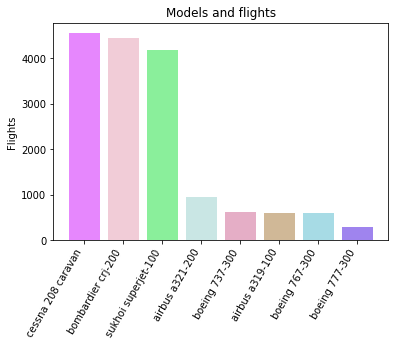

In [16]:
df1 = df1.sort_values(by='flights_amount', ascending=False)
names = df1['model']
flights = df1['flights_amount'] 
color_rectangle = np.random.rand(8, 4)

plt.bar(names, flights, align = 'center', alpha=0.5, color = color_rectangle) 
plt.gca().set_xticklabels(df1['model'], rotation=60, horizontalalignment= 'right')
plt.ylabel('Flights') 
plt.title('Models and flights') 

plt.show()

**Вывод**

Больше всего для перелетов за сентябрь 2018 года использовались три модели:

- bombardier crj-200
- cessna 208 caravan
- sukhoi superjet-100

### Города и количество рейсов

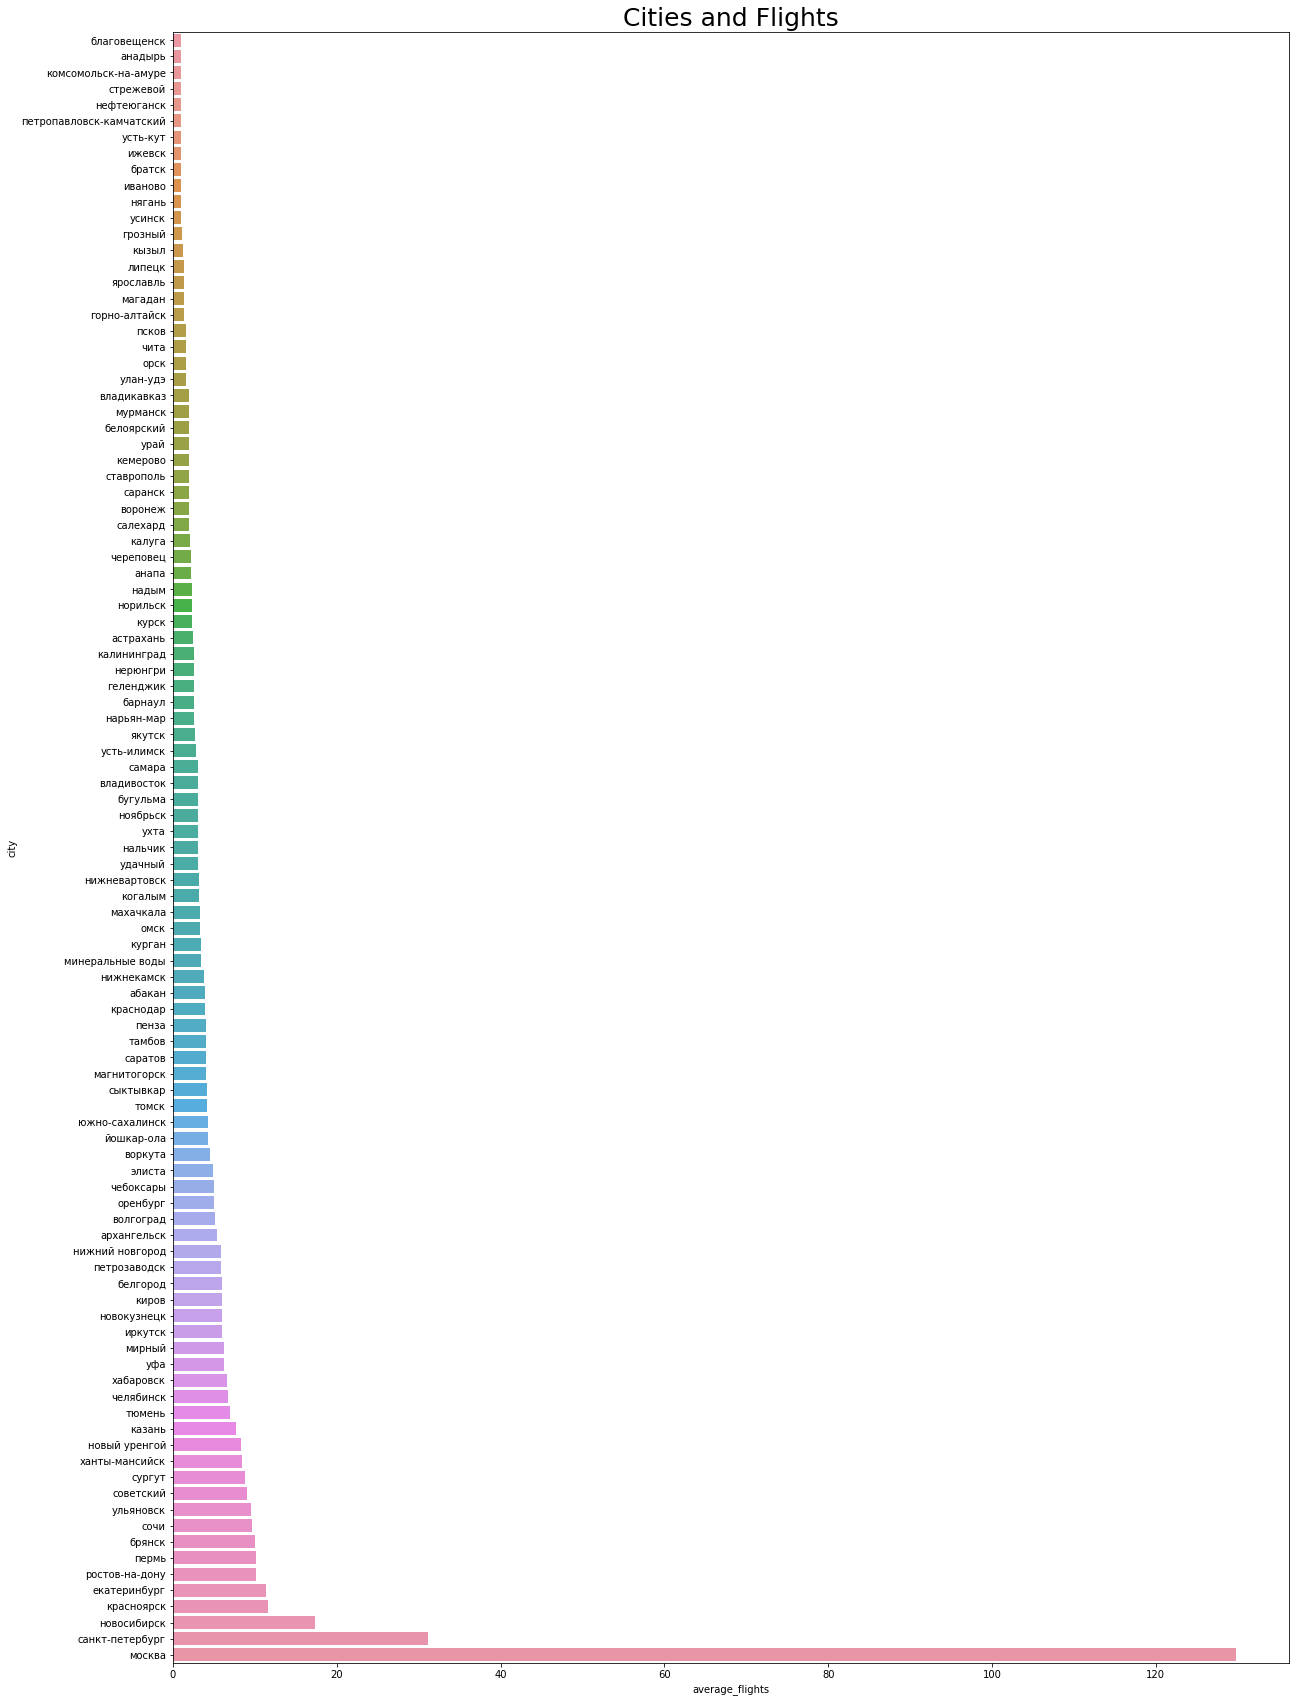

In [17]:
plt.figure(figsize=(20, 30))
sns.barplot(x='average_flights', y='city', data=df2.sort_values(by='average_flights'))
plt.title('Cities and Flights', fontsize=25)
plt.xlabel('average_flights')
plt.show()

**Вывод**

Несомненнным лидером по средним авиаперелетам в день за август 2018 года является Москва, что вполне себе ожидаемо.

### Топ-10 городов и количество рейсов

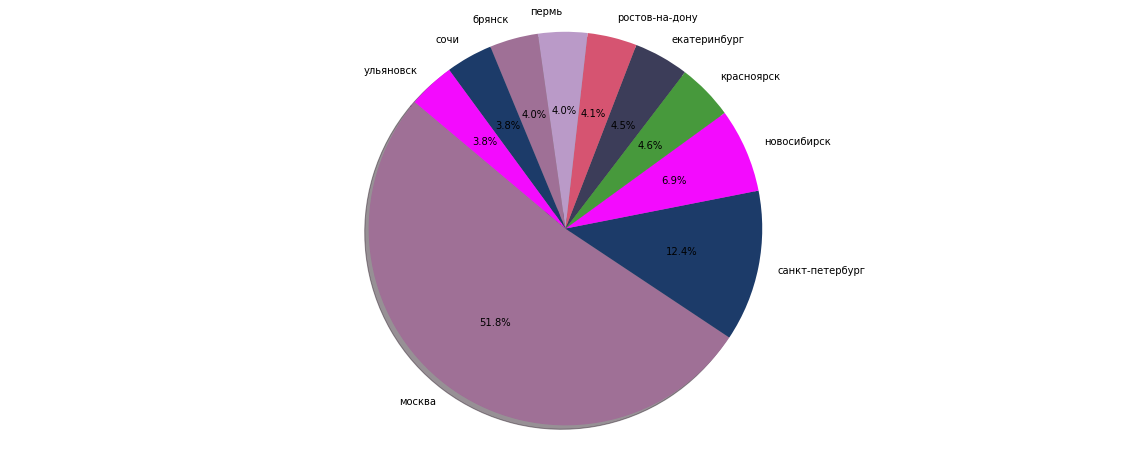

In [18]:
names = df3['city'] 
flights = df3['average_flights'] 
colors = np.random.rand(7, 3) 

plt.figure(figsize=(20,8))
plt.pie(flights, labels=names, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140) 
plt.axis('equal') 
plt.show()

**Вывод**

После выделения 10 городов видно, что из топ-10 половина авиаперелетов приходится на Москву. 2ое место приходится на Питер. Что же касается остальных городов из топа, то имеем следующее:
- По состоянию на 2018 год Новосибирск являлся 3м город РФ по численности населения. Также он является хабом компании S7 + находится по середине страны и является транзитным городом.

- Что касается Красноярска: Красноярский край яваляется лидером страны по природным ресурсам, а потому возможно из-за этого он входит в ТОП, тк туда прилетают на заработки работники сфер деятельности приближенных к разработкам ресурсов.

- Далее следует Екатеринбург. По состоянию на 2018 год данный город занимает 4ое место по численности населения, а потому и данное направление выделяется среди 101 города.

- Ростов также является городом милионником + он является самым крупным городом юга России. Это главный город Ростовской области и Южного административного округа, крупный промышленный, научный, торговый и культурный центр.
    
- Пермь также является городом милионником, при этом Пермь один из крупнейших центров добычи полезных ископаемых и минерального сырья в России (нефть, газ, минеральные соли, хромитовые руды). 
    
- Не смотря на то что Брянск по состоянию на 2018 год не являлся город милионником, однако он попал в ТОП направлений. Это может быть связано с тем что Брянск издавна считается крупным промышленным центром. Основная отрасль в экономике связаны с машиностроением и металлообработкой. Поэтому мы можем предположить что данный город поэтому и попал в ТОП благодаря тому что может привлекать сторонних специалистов из других городов для работы.
    
- Сочи ожидаемо попадает в ТОП так как это одно из самых популярных курортных направлений в России.
    
- Ульяновск — промышленный город. Тут делают уазики, самолеты, патроны, медицинское оборудование, шоколадки «Марс», мебель, металлообрабатывающие станки DMG Mori, минеральную воду «Волжанка» и еще много всего. 

## Выводы

**Модели самолетов и количество рейсов:**

- Наиболее популярными самолетами на внутренних авиарейсах в России являются ***bombardier crj-200***, ***cessna 208 caravan*** и ***sukhoi superjet-100*** - самое большее количество перелетов приходится именно на эти модели по состоянию на 2018 год. Это объясняется тем, что финансовая возможность для покупки самолетов ***CRJ 200*** у российских компаний появилась благодаря вторичному рынку. Именно в этот период ряд западных авиакомпаний вывел самолеты данной модели из своего активного флота, и у российских перевозчиков появилась возможность купить бывшую в употреблении технику. 
- Малые однодвигательные самолеты редко попадают в глобальную статистику мировой авиации. Считается, что их удел – короткие развлекательные полеты в районе аэроклуба. Однако, мировой опыт позволяет заявить, что даже небольшие воздушные суда ***Cessna*** могут быть основой для успешной авиакомпании. Важно при этом отметить, что их эксплуатация проходит не в тепличных условиях околоэкваториальных широт, а в суровых северных краях – как например Север России.
- Как известно авиакомпания «Россия», начала вводить в эксплуатацию самолеты ***SSJ-100***, которые в большинстве своем перекочевали из «Аэрофлота». Самое интересное, что данный переход самолетов весьма динамичный. С момента начала ввода самолетов ***SSJ-100*** во флот «России» до сегодняшних дней, прошло не так много времени, а результат на лицо, более 30 самолетов уже на балансе крупнейшего авиаперевозчика. Именно быстрый ввод в эксплуатацию такого количества самолетов за такой маленький промежуток времени, стал рекордным по сравнению с другими авиакомпаниями.

**Города и количество рейсов:**

- По состоянию на август 2018 года меньше всего перелетов приходится на Благовещенск, в то время как ожидаемым лидером является Москва. Вполне ожидаемо что в день на столицу приходится гораздо больше перелетов нежели чем на другие города РФ. 

**Топ-10 городов и количество рейсов:**

- Если отобрать лишь 10 городов по среднему количеству авиаперелетов в день, то можно заметить что большую долю занимает Москва - ожидаемо. Самое меньшее AVG из топ-10 приходится на Ульяновск.
Вполне возможно что в ТОП 10 попали именно эти города благодаря не столько их культурной и туристической привлекательности, сколько благодаря экономической состоявляющей, которая является потенциально привлекательной и прибыльной для людей связанных с производством сырья, разработкой полезных ископаемых и так далее.